# <img style="float: left; padding-right: 30px; width: 225px" src="media/UC.png">  IMT2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2023-2**<br>
**Profesor:** Rodrigo A. Carrasco <br>
__**Integrantes:**__ Christian Camilo | Ignacio Moya | Simon Poblete | Tomás Romero | Benjamín Ruiz

# <h1><center>AVES DE CHILE</center></h1>

## 1.- Contexto y Motivación🦾
El proyecto se enfoca en analizar avistamientos de aves con el objetivo de comprender cómo eventos como la pandemia y los incendios forestales de 2017 han afectado estos avistamientos. La motivación surge de la importancia de entender la interacción entre la vida silvestre y eventos ambientales extremos, así como su interaccion con seres humanos.

## 2.- Preguntas objetivo❓
- ¿La frecuencia de avistamientos de aves, o la cantidad de especies vario con los incendios y pandemia, respecto a otros años?
- Si es asi, ¿Qué especies de aves se ven más afectadas?
- ¿Existe algún(os) tipo(s) de ave(s) que en base a estas problemáticas pueden estar en peligro de extinción?

## 3.- Datos🗒️
Para llevar a cabo este proyecto, aprovecharemos la API proporcionada por [eBird](https://documenter.getpostman.com/view/664302/S1ENwy59#5a1e27e9-128f-4ab5-80ad-88cd6de10026). Utilizamos esta interfaz para obtener datos sobre avistamientos de aves en territorio chileno desde 2015 hasta 2022, incluyendo información sobre la taxonomía de las aves y las ubicaciones específicas donde se realizaron los avistamientos. Además, disponemos de un conjunto de datos que contiene información sobre los incendios registrados en nuestro país. También contamos con un archivo SHP que proporciona información geoespacial sobre las distintas regiones de Chile.

## 4.- Librerías y carga de DF📚

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
import os 

warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

In [141]:
# Aves y avistamientos
df_aves_15 = pd.read_csv("data/avistamientos/vis_2015.csv")
df_aves_16 = pd.read_csv("data/avistamientos/vis_2016.csv")
df_aves_17 = pd.read_csv("data/avistamientos/vis_2017.csv")
df_aves_18 = pd.read_csv("data/avistamientos/vis_2018.csv")
df_aves_19 = pd.read_csv("data/avistamientos/vis_2019.csv")
df_aves_20 = pd.read_csv("data/avistamientos/vis_2020.csv")
df_aves_21 = pd.read_csv("data/avistamientos/vis_2021.csv")
df_aves_22 = pd.read_csv("data/avistamientos/vis_2022.csv")

df_aves = [df_aves_15, df_aves_16, df_aves_17, df_aves_18, df_aves_19, df_aves_20, df_aves_21, df_aves_22]

tax = pd.read_csv("data/taxonomia/taxonomia.csv")

# Incendios forestales y daños, causas, ocurrencia
df_ocurrencia_incendios = pd.read_csv("data/ocurrencia_incendios/ocurrencia_incendios_region.csv")
df_causas_incendios = pd.read_csv("data/causas_incendios/causas_incendios.csv")
df_danos_superficie = pd.read_csv("data/danos_superficies_hectareas/danos_superficies_limpio.csv")
#df_incendios = pd.read_csv("data/incendios/incendios_filtrados.csv") omitimos por ignorancia

df_danos_comuna_2014_2015 = pd.read_csv("data/danos_hectareas_comunas/danos_hectareas_comunas (2014 - 2015).csv")
df_danos_comuna_2015_2016 = pd.read_csv("data/danos_hectareas_comunas/danos_hectareas_comunas (2015 - 2016).csv")
df_danos_comuna_2016_2017 = pd.read_csv("data/danos_hectareas_comunas/danos_hectareas_comunas (2016 - 2017).csv")
df_danos_comuna_2017_2018 = pd.read_csv("data/danos_hectareas_comunas/danos_hectareas_comunas (2017 - 2018).csv")
df_danos_comuna_2018_2019 = pd.read_csv("data/danos_hectareas_comunas/danos_hectareas_comunas (2018 - 2019).csv")
df_danos_comuna_2019_2020 = pd.read_csv("data/danos_hectareas_comunas/danos_hectareas_comunas (2019 - 2020).csv")
df_danos_comuna_2020_2021 = pd.read_csv("data/danos_hectareas_comunas/danos_hectareas_comunas (2020 - 2021).csv")
df_danos_comuna_2021_2022 = pd.read_csv("data/danos_hectareas_comunas/danos_hectareas_comunas (2021 - 2022).csv")
df_danos_mes_2014_2015 = pd.read_csv("data/danos_hectareas_meses/dano_hectareas_mes (2014 - 2015).csv")
df_danos_mes_2015_2016 = pd.read_csv("data/danos_hectareas_meses/dano_hectareas_mes (2015 - 2016).csv")
df_danos_mes_2016_2017 = pd.read_csv("data/danos_hectareas_meses/dano_hectareas_mes (2016 - 2017).csv")
df_danos_mes_2017_2018 = pd.read_csv("data/danos_hectareas_meses/dano_hectareas_mes (2017 - 2018).csv")
df_danos_mes_2018_2019 = pd.read_csv("data/danos_hectareas_meses/dano_hectareas_mes (2018 - 2019).csv")
df_danos_mes_2019_2020 = pd.read_csv("data/danos_hectareas_meses/dano_hectareas_mes (2019 - 2020).csv")
df_danos_mes_2020_2021 = pd.read_csv("data/danos_hectareas_meses/dano_hectareas_mes (2020 - 2021).csv")
df_danos_mes_2021_2022 = pd.read_csv("data/danos_hectareas_meses/dano_hectareas_mes (2021 - 2022).csv")

In [142]:
#Pasamos las fechas a formato datetime
for i in range(len(df_aves)):
    df_aves[i]['obsDt'] = pd.to_datetime(df_aves[i]['obsDt'])

## 5.- Pandemia😷

La pandemia de Covid-19 ocurrió entre 2020 y 2021, donde la mayor parte del tiempo entre estos años, estuvimos confinados en nuestros hogares, por lo tanto analizaremos el comportamiento de las aves avistadas en estos años, contrastandolos con los años 2019 y 2022

In [143]:
df_aves_19.head()

,speciesCode,comName,sciName,locId,locName,obsDt,howMany,lat,lng,locationPrivate,exoticCategory,region
0,soulap1,Southern Lapwing,Vanellus chilensis,L4026975,Loma Linda,2019-01-01,1.0,-33.435764,-71.677103,False,-1,Valparaíso
1,brnowl,Barn Owl,Tyto alba,L4026975,Loma Linda,2019-01-01,1.0,-33.435764,-71.677103,False,-1,Valparaíso
2,aupowl1,Austral Pygmy-Owl,Glaucidium nana,L4026975,Loma Linda,2019-01-01,1.0,-33.435764,-71.677103,False,-1,Valparaíso
3,austhr1,Austral Thrush,Turdus falcklandii,L7488647,Plaza Melvin Jones,2019-01-01,1.0,-33.451996,-70.593581,False,-1,Región Metropolitana de Santiago
4,whcela1,White-crested Elaenia,Elaenia albiceps,L8346445,"1485 Loncoyen, Valdivia, Región de los Ríos, C...",2019-01-01,0.0,-39.824130,-73.278223,True,-1,Los Ríos


In [144]:
df_aves_19.sort_values(by="howMany", ascending=False).head(10)

,speciesCode,comName,sciName,locId,locName,obsDt,howMany,lat,lng,locationPrivate,exoticCategory,region
7533,sooshe,Sooty Shearwater,Ardenna grisea,L8576098,"(-44,777, -74,384)",2019-02-08,20000.0,-44.776836,-74.384086,True,-1,Aisén del General Carlos Ibáñez del Campo
40036,guacor1,Guanay Cormorant,Leucocarbo bougainvillii,L9883938,"CL (-20,298, -70,143)",2019-09-06,15000.0,-20.297630,-70.142652,True,-1,Tarapacá
51265,sooshe,Sooty Shearwater,Ardenna grisea,L10156891,"CL (-45,823, -74,921)",2019-11-08,10000.0,-45.823165,-74.920791,True,-1,Aisén del General Carlos Ibáñez del Campo
14220,fragul,Franklin's Gull,Leucophaeus pipixcan,L668852,Río Lluta--Desembocadura,2019-03-17,6000.0,-18.416539,-70.322408,False,-1,Arica y Parinacota
61698,eleter1,Elegant Tern,Thalasseus elegans,L10385379,"31 dec. 2019 19:52\r\n-18,492, -70,329",2019-12-31,6000.0,-18.492109,-70.328532,True,-1,Arica y Parinacota
46624,guacor1,Guanay Cormorant,Leucocarbo bougainvillii,L796063,SN Campo dunar de Concón--Roca Oceánica,2019-10-16,5500.0,-32.941263,-71.554186,False,-1,Valparaíso
23958,slbpar1,Slender-billed Parakeet,Enicognathus leptorhynchus,L9296278,"U-99-V, Puerto Clocker, Región de los Lagos, C...",2019-05-18,5000.0,-41.006628,-72.673479,True,-1,Los Lagos
13225,sooshe,Sooty Shearwater,Ardenna grisea,L8835434,T-352,2019-03-11,5000.0,-39.780647,-73.391564,True,-1,Los Ríos
17272,blnswa2,Black-necked Swan,Cygnus melancoryphus,L8972803,"(-39.686, -73.182)",2019-04-04,4700.0,-39.685692,-73.181934,True,-1,Los Ríos
11418,perboo1,Peruvian Booby,Sula variegata,L602414,Acantilados de la Quirilluca,2019-02-28,4496.0,-32.687498,-71.449413,False,-1,Valparaíso


In [145]:
df_aves_19.dtypes

speciesCode                object
comName                    object
sciName                    object
locId                      object
locName                    object
obsDt              datetime64[ns]
howMany                   float64
lat                       float64
lng                       float64
locationPrivate              bool
exoticCategory              int64
region                     object
dtype: object

In [146]:
df_aves_19.groupby(by="comName").sum('howMany').reset_index().sort_values(by="howMany", ascending=False)

,comName,howMany,lat,lng,locationPrivate,exoticCategory
347,Sooty Shearwater,53720.0,-7597.871559,-13203.142375,93,-184
181,Guanay Cormorant,42422.0,-6848.262157,-16684.024688,52,-234
149,Franklin's Gull,25153.0,-6886.435551,-15431.016202,39,-215
386,Upland Goose,20302.0,-17682.340562,-24191.688202,177,-341
339,Slender-billed Parakeet,20231.0,-13272.223946,-23827.651438,71,-326
...,...,...,...,...,...,...
162,Gray-breasted Martin,1.0,-18.216103,-69.301457,0,-1
227,Mandarin Duck,1.0,-36.828747,-73.010057,1,1
393,Wedge-tailed Shearwater,1.0,-27.200003,-109.454223,0,-1
392,Wedge-rumped Storm-Petrel,1.0,-24.508915,-73.370752,1,-1


## 6.- Incendios 🔥🌲

Los incendios también son una causa de preocupación ya que pueden afectar el hábitat de las aves. Es por esto de que analizaremos la cantidad total de incendios ocurridos en Chile durante los años 2015-2022, y veremos si existe una relación entre la cantidad de incendios y la cantidad de aves avistadas.

In [147]:
df_ocurrencia_incendios['PERIODO'] = df_ocurrencia_incendios['PERIODO'].apply(lambda x: int(x.split("-")[0])).unique()
df_ocurrencia_incendios = df_ocurrencia_incendios[df_ocurrencia_incendios['PERIODO'] >= 2015]
df_ocurrencia_incendios

,PERIODO,XV,I,II,III,IV,V,RM,VI,VII,XVI,VIII,IX,XIV,X,XI,XII,TOTAL
39,2015,0,0,0,27,96,760,274,205,796,0,2691,1344,183,333,50,25,6784
40,2016,1,0,0,14,101,961,388,255,631,0,1951,753,78,92,21,28,5274
41,2017,6,1,0,20,110,986,501,296,802,0,2116,969,84,157,21,12,6081
42,2018,11,2,0,29,86,905,532,344,951,547,2134,1352,123,143,40,20,7219
43,2019,8,7,11,32,85,629,416,402,1161,482,2790,1802,121,155,19,7,8127
44,2020,10,6,5,12,58,418,352,223,725,481,2894,1367,144,338,48,20,7101
45,2021,6,3,3,14,59,444,295,307,898,530,2472,1457,112,297,35,15,6947


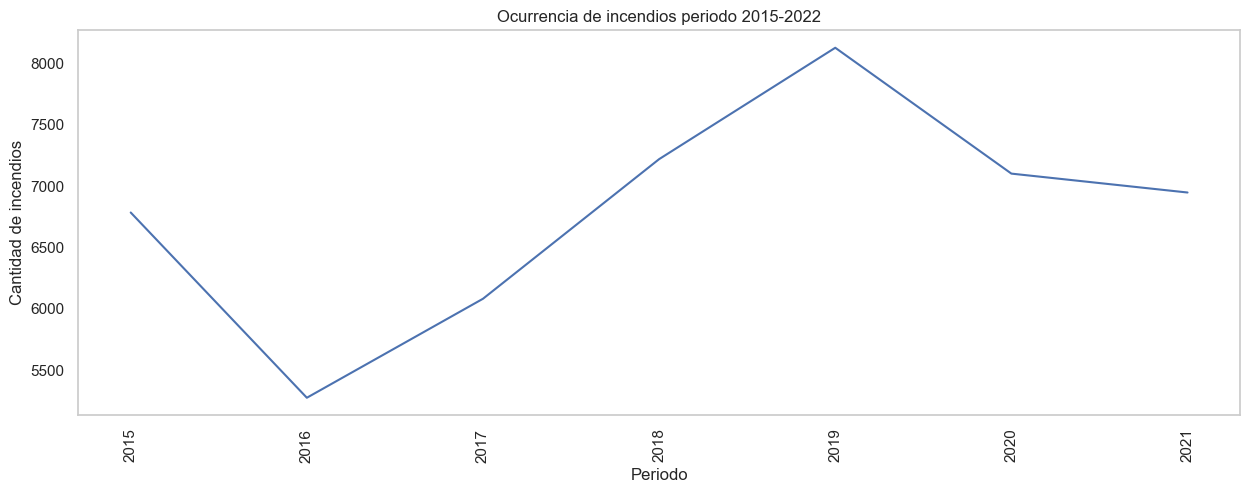

In [148]:
# Graficamos la ocurrencia de incendios periodo 2014-2022
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_ocurrencia_incendios, x="PERIODO", y="TOTAL")
plt.title("Ocurrencia de incendios periodo 2015-2022")
plt.xlabel("Periodo")
plt.ylabel("Cantidad de incendios")
plt.grid()
plt.xticks(rotation=90)
plt.show()


### Análisis Ocurrencia de Incendios 🔥🌲

Podemos apreciar que los incendios han ido en aumento durante este último tiempo, por lo que analizaremos más detalladamente los daños generados por estos incendios.

In [149]:
# Analizamos los daños por incendios en el país
df_danos_superficie['PERIODO'] = df_danos_superficie['PERIODO'].apply(lambda x: int(x.split("-")[0])).unique()
df_danos_superficie = df_danos_superficie[df_danos_superficie['PERIODO'] >= 2015]

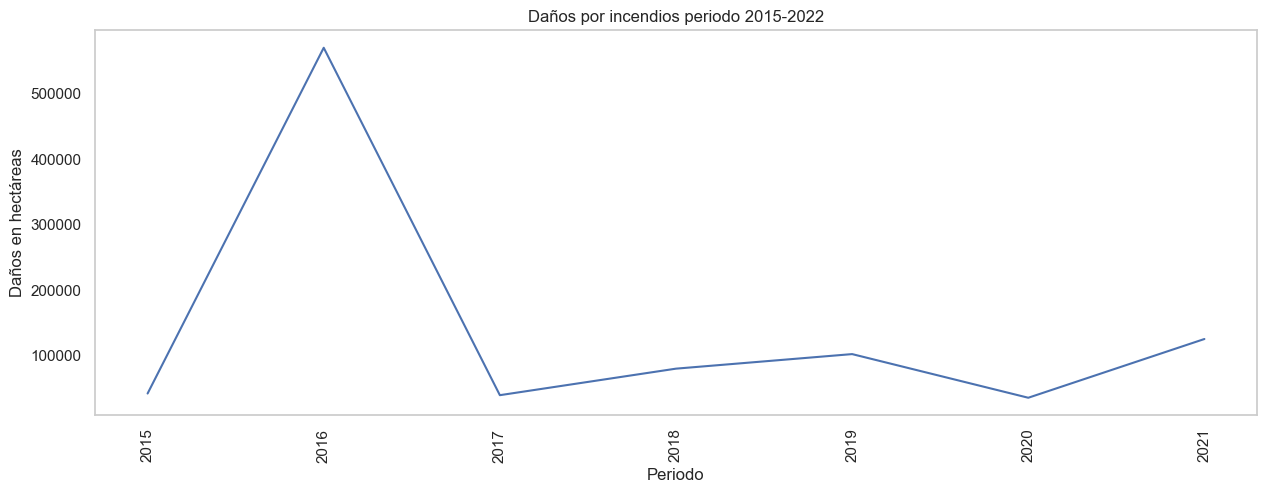

In [150]:
# Graficamos los daños por incendios periodo 2014-2022
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_danos_superficie, x="PERIODO", y="TOTAL")
plt.title("Daños por incendios periodo 2015-2022")
plt.xlabel("Periodo")
plt.ylabel("Daños en hectáreas")
plt.grid()
plt.xticks(rotation=90)
plt.show()

In [151]:
df_danos_superficie[df_danos_superficie["TOTAL"] == df_danos_superficie["TOTAL"].max()]

,PERIODO,XV,I,II,III,IV,V,RM,VI,VII,XVI,VIII,IX,XIV,X,XI,XII,TOTAL
40,2016,0.5,0.0,0.0,42.24,3639.83,27118.14,53235.73,105542.93,252556.1,0.0,119409.11,8361.48,94.5,127.3,7.54,61.99,570197.0


### Análisis de Daños por Incendios 🔥🌲

Como podemos apreciar, a pesar de existir una ocurrencia de incencios muy baja entre los años 2015-2018, los daños generados por estos incendios son muy altos, por lo que podemos concluir que los incendios que ocurrieron en estos años fueron de gran magnitud. Más específicamente, podemos ver que el año 2016 fue el año con mayor cantidad de incendios y con mayor daño generado por estos, siendo las regiones más afectadas la región del Maule y la región de O'Higgins, junto con la región del Biobío, por lo que éstos serán los focos de nuestro análisis.

### Análisis de Causas de Incendios 🔥🌲

Antes de analizar los incendios en las regiones de O'Higgins, Maule y Biobío, analizaremos las causas de los incendios en Chile, para así poder entender mejor el contexto de los incendios en estas regiones.

In [152]:
df_causas_incendios.head()

,AÑO,ACCIDENTALES,INTENCIONALES,NATURALES,DESCONOCIDAS
0,2003,3820,1714,4,2034
1,2004,3070,1190,23,2147
2,2005,3192,1763,18,1680
3,2006,3258,1741,6,391
4,2007,3286,1463,14,380


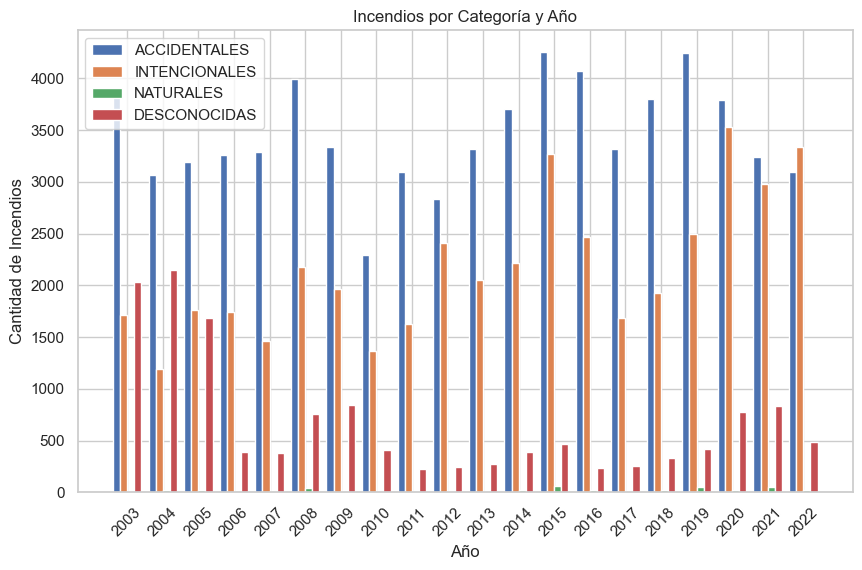

In [153]:
# Graficar los datos
fig, ax = plt.subplots(figsize=(10, 6))

# Barra para cada categoría
bar_width = 0.2
bar_positions = range(len(df_causas_incendios['AÑO']))

# Barra para ACCIDENTALES
plt.bar(bar_positions, df_causas_incendios['ACCIDENTALES'], width=bar_width, label='ACCIDENTALES')

# Barra para INTENCIONALES
plt.bar([p + bar_width for p in bar_positions], df_causas_incendios['INTENCIONALES'], width=bar_width, label='INTENCIONALES')

# Barra para NATURALES
plt.bar([p + 2 * bar_width for p in bar_positions], df_causas_incendios['NATURALES'], width=bar_width, label='NATURALES')

# Barra para DESCONOCIDAS
plt.bar([p + 3 * bar_width for p in bar_positions], df_causas_incendios['DESCONOCIDAS'], width=bar_width, label='DESCONOCIDAS')

# Configurar el eje x
plt.xlabel('Año')
plt.xticks([p + 1.5 * bar_width for p in bar_positions], df_causas_incendios['AÑO'])

# Configurar el eje y
plt.ylabel('Cantidad de Incendios')

# Añadir leyenda
plt.legend()

# Añadir título
plt.title('Incendios por Categoría y Año')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

In [154]:
df_causas_incendios[df_causas_incendios["ACCIDENTALES"] == df_causas_incendios["ACCIDENTALES"].max()]

,AÑO,ACCIDENTALES,INTENCIONALES,NATURALES,DESCONOCIDAS
12,2015,4252,3273,58,465


Como podemos apreciar, la principal causa de incendios en Chile es de carácter accidental, seguido por la causa intencional, por lo que podemos concluir que la mayoría de los incendios en Chile son causados por el ser humano, algo que pudo haber sido completamente evitable.

## ¿Qué podemos concluir de esto?

Inicialmente, es interesante observar que la mayoría de los incendios provocados fueron atribuibles a actividades humanas, en lugar de causas naturales. Estos datos sugieren que, en muchos casos, la responsabilidad de los incendios recae directamente en las acciones humanas, lo que plantea la cuestión de la relación entre el cambio climático y las actividades humanas, siendo estas últimas un factor determinante en la ocurrencia de incendios.

Durante el periodo 2016-2017, se registró uno de los eventos de incendio forestal más extensos en términos de superficie (de hecho, fue dada a conocer como una tormenta de fuego). Aunque la cantidad total de incendios puede no haber sido significativa, la magnitud y el impacto medioambiental de este suceso fueron notables. Este incidente destacó por su gran tamaño y consecuencias ambientales significativas.

Centrándonos en el impacto medioambiental, es evidente que eventos de gran amplitud, como el ya mencionado, pueden influir en el comportamiento y la diversidad de las aves en la región(es) afectada. La presencia de incendios a gran escala puede alterar tanto el comportamiento como el tipo de aves avistadas en esa área. Esto se debe a que las aves se ven obligadas a emigrar hacia otras zonas para garantizar su supervivencia, o lamentablemente, algunas pueden perecer como resultado del incendio.

En un sentido más general, cada vez que se produce un incendio en una región específica, se observa un impacto directo en la cantidad y diversidad de aves presentes en ese entorno. Este fenómeno subraya la estrecha interconexión entre los incendios forestales y la vida silvestre, evidenciando la necesidad de abordar y gestionar adecuadamente estos eventos para preservar la biodiversidad y el equilibrio ecológico.

### Ahora realizamos la conexion entre incendios y la cantidad de avistamientos con las especies de aves.

Principalmente analizaremos con la cantidad de avistamientos de aves en Chile, y veremos si existe una relación entre la cantidad de avistamientos y la cantidad de incendios o la superficie quemada.


Como las regiones mas afectadas fueron las de O'Higgins, Maule y BioBio, nos enfocaremos en estas para hacer el estudio de cantidad de aves avistadas, haciendo el contraste con el anho 2016 y 2018, respecto a 2017, especificamente los meses de noviembre y marzo

In [155]:
df_danos_mes_2016_2017

,MES,XV,I,II,III,IV,V,RM,VI,VII,VIII,IX,XIV,X,XI,XII
0,JULIO,0.0,0.0,0.0,0.3,0.0,10.0,1.9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,AGOSTO,0.0,0.0,0.0,0.2,30.0,21.4,0.0,0.0,2.0,0.4,0.0,0.0,0.0,0.0,6.2
2,SEPTIEMBRE,0.0,0.0,0.0,14.6,16.9,208.9,59.2,4.9,288.1,222.2,119.4,2.3,0.8,0.6,2.6
3,OCTUBRE,0.0,0.0,0.0,14.6,109.1,278.7,663.0,38.3,18.0,23.8,4.5,21.7,0.3,0.4,15.4
4,NOVIEMBRE,0.0,0.0,0.0,0.0,72.0,4097.9,15402.4,7396.8,234.8,323.6,140.6,17.1,4.9,5.3,2.7
5,DICIEMBRE,0.0,0.0,0.0,1.6,165.6,8141.9,5010.5,13565.7,7017.1,878.9,91.5,1.2,4.6,0.3,32.9
6,ENERO,0.5,0.0,0.0,0.0,3165.7,12272.5,31415.1,83063.3,241211.6,114822.5,7226.8,14.1,21.0,0.0,0.6
7,FEBRERO,0.0,0.0,0.0,0.0,16.7,982.1,513.1,443.2,3077.2,2336.5,459.5,68.2,56.5,0.0,1.5
8,MARZO,0.0,0.0,0.0,1.8,19.8,948.2,81.3,973.6,567.0,618.1,274.4,2.0,5.7,0.0,0.0
9,ABRIL,0.0,0.0,0.0,9.2,44.0,103.2,77.1,41.1,115.0,182.3,44.3,0.8,0.8,0.0,0.0


In [156]:
dfs_estudio = pd.concat([df_aves_15, df_aves_16, df_aves_17, df_aves_18])
df1 = dfs_estudio[
    ((dfs_estudio['obsDt'].dt.year == 2015) & dfs_estudio['obsDt'].dt.month.between(11, 12)) 
    |
    ((dfs_estudio['obsDt'].dt.year == 2016) & dfs_estudio['obsDt'].dt.month.between(1, 3))
]
df2 = dfs_estudio[
    ((dfs_estudio['obsDt'].dt.year == 2016) & dfs_estudio['obsDt'].dt.month.between(11, 12)) 
    |
    ((dfs_estudio['obsDt'].dt.year == 2017) & dfs_estudio['obsDt'].dt.month.between(1, 3))
]

df3 = dfs_estudio[
    ((dfs_estudio['obsDt'].dt.year == 2017) & dfs_estudio['obsDt'].dt.month.between(11, 12)) 
    |
    ((dfs_estudio['obsDt'].dt.year == 2018) & dfs_estudio['obsDt'].dt.month.between(1, 3))
]

dfs_estudio = [df1, df2, df3]
for i in range(len(dfs_estudio)):
    #Seleccionamos las regiones que nos interesan
    dfs_estudio[i] = dfs_estudio[i][(dfs_estudio[i]['region'] == 'Bío-Bío') | (dfs_estudio[i]['region'] == 'Maule') | (dfs_estudio[i]['region'] == "Libertador General Bernardo O'Higgins")]
    dfs_estudio[i] = dfs_estudio[i].groupby(by=['region', 'obsDt']).size().reset_index(name='cantidad')

In [157]:
dfs_estudio[0]

,region,obsDt,cantidad
0,Bío-Bío,2015-11-01,4
1,Bío-Bío,2015-11-02,14
2,Bío-Bío,2015-11-03,10
3,Bío-Bío,2015-11-07,12
4,Bío-Bío,2015-11-09,10
...,...,...,...
214,Maule,2016-03-19,1
215,Maule,2016-03-21,9
216,Maule,2016-03-22,21
217,Maule,2016-03-23,21


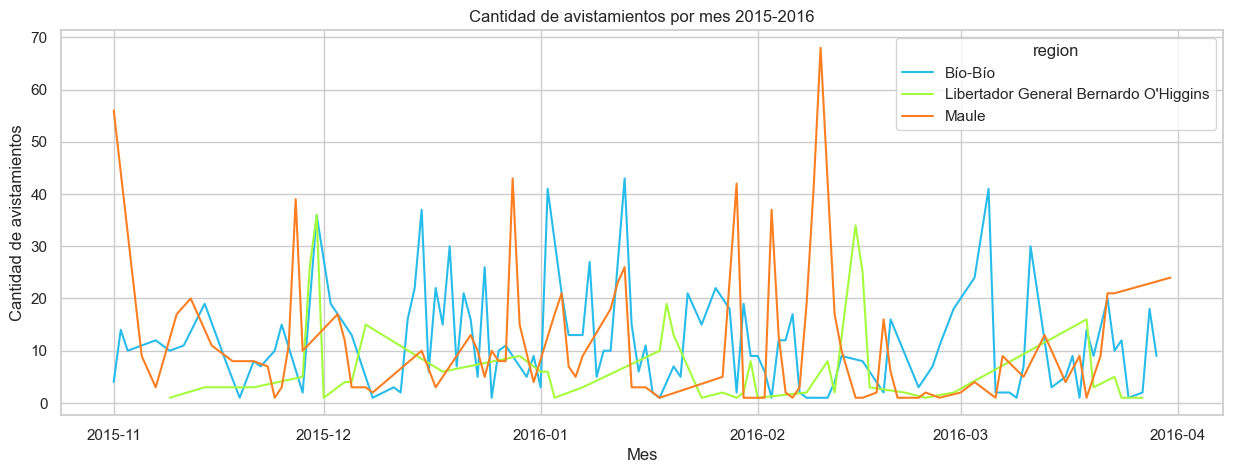

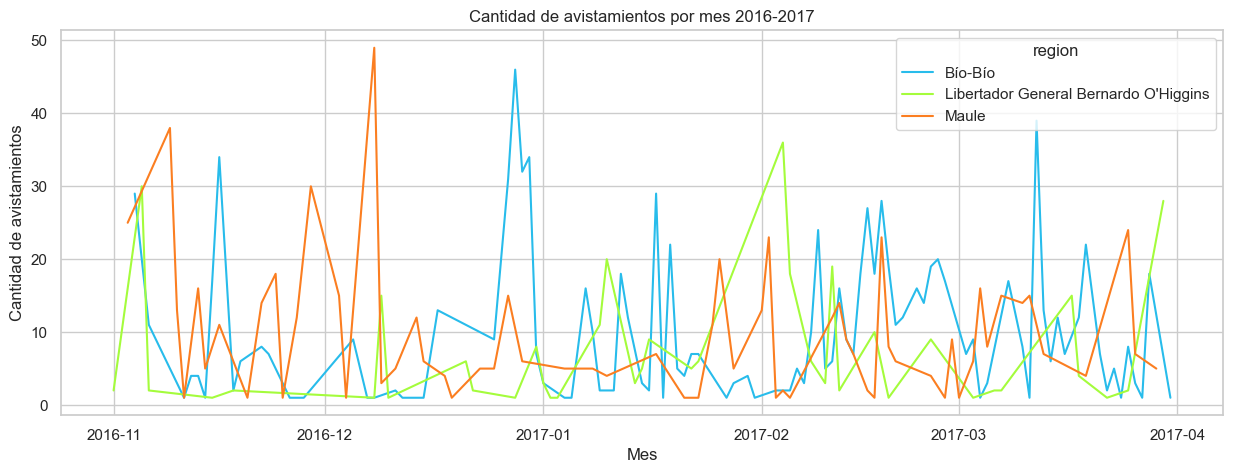

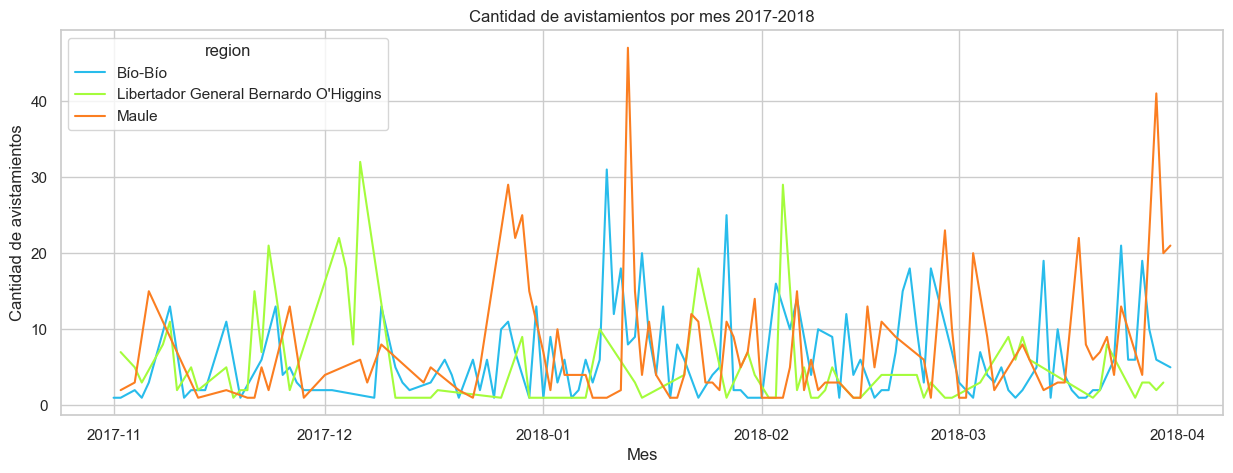

In [158]:
for df in dfs_estudio:
    plt.figure(figsize=(15, 5))
    sns.lineplot(data=df, x=df['obsDt'], y="cantidad", hue="region", palette='turbo', ci=None)
    plt.title(f"Cantidad de avistamientos por mes {df['obsDt'].dt.year.unique()[0]}-{df['obsDt'].dt.year.unique()[1]}")
    plt.xlabel("Mes")
    plt.ylabel("Cantidad de avistamientos")
    plt.grid(True)


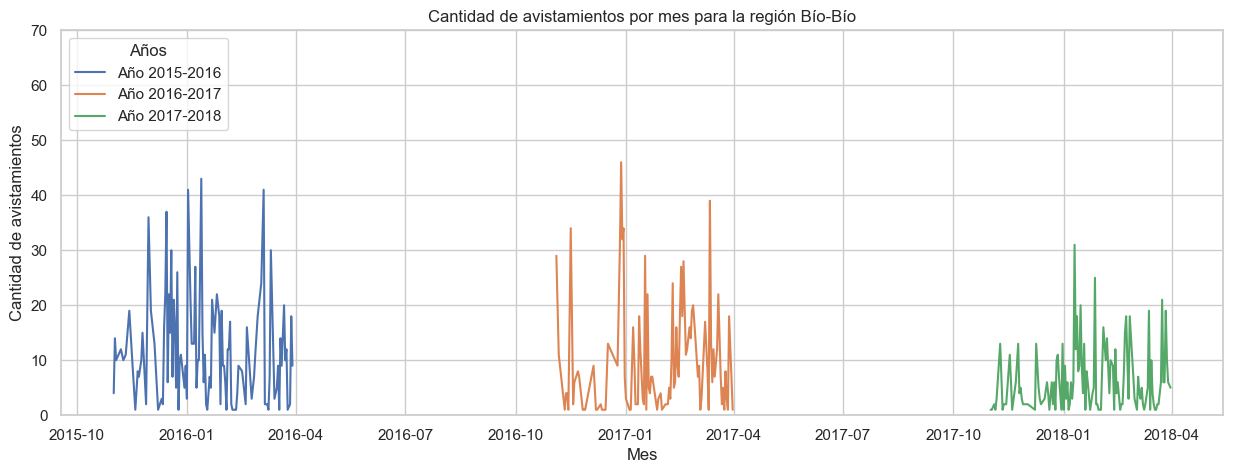

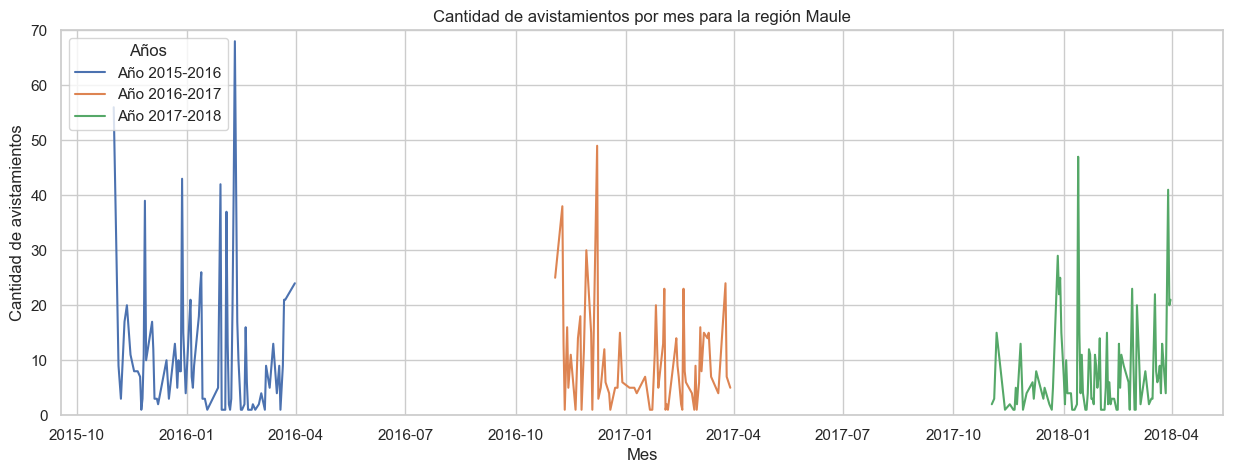

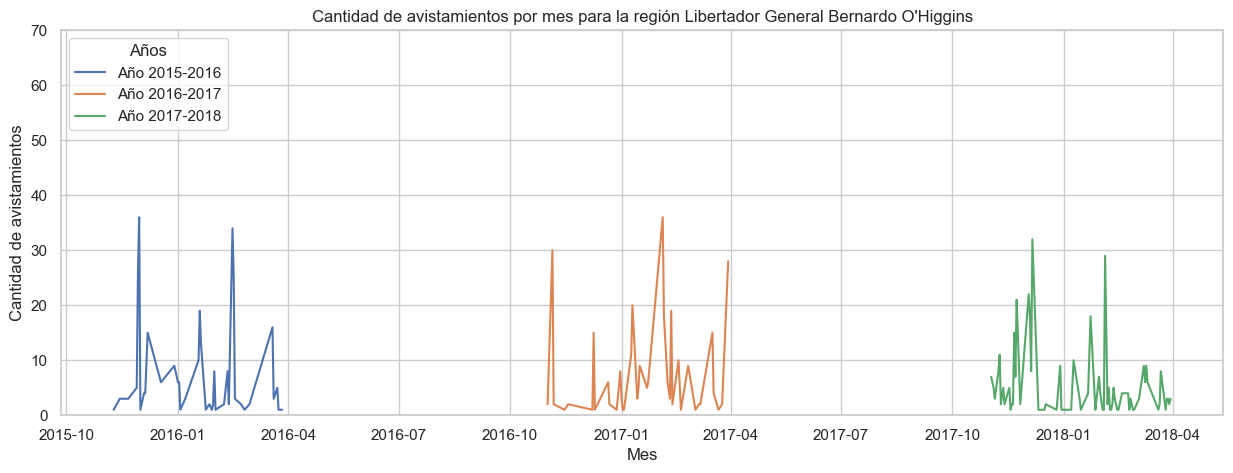

In [159]:
regions_of_interest = ['Bío-Bío', 'Maule', "Libertador General Bernardo O'Higgins"]

for region in regions_of_interest:
    plt.figure(figsize=(15, 5))
    plt.title(f"Cantidad de avistamientos por mes para la región {region}")

    for df in dfs_estudio:
        # Filtrar por región
        df_region = df[df['region'] == region]

        # Crear el gráfico de líneas
        sns.lineplot(data=df_region, x=df_region['obsDt'], y="cantidad", label=f"Año {df_region['obsDt'].dt.year.unique()[0]}-{df_region['obsDt'].dt.year.unique()[1]}")

    plt.xlabel("Mes")
    plt.ylim(0, 70)
    plt.ylabel("Cantidad de avistamientos")
    plt.legend(title='Años', loc='upper left')
    plt.grid(True)

plt.show()


Analizando los gráficos por mes y relacionados con cada una de las regiones, podemos ver que existe una disminución de avistamientos de aves en el mes de enero para el año 2017, esto se puede deber a que en este mes se produjo el incendio forestal más grande de la historia de Chile, el cual afectó principalmente a las regiones de O'Higgins, Maule y BioBio, por lo que podemos concluir que los incendios forestales afectan directamente a la cantidad de aves avistadas en Chile.

Como la region del Maule fue la mas afectada, nos enfocaremos en esta region para ver mas a fondo las especies afectadas

In [160]:
dfs_estudio = pd.concat([df_aves_15, df_aves_16, df_aves_17, df_aves_18])
dfs_estudio = dfs_estudio[(dfs_estudio['region'] == 'Bío-Bío') | (dfs_estudio['region'] == 'Maule') | (dfs_estudio['region'] == "Libertador General Bernardo O'Higgins")]

#2015-2016
df1 = dfs_estudio[
    ((dfs_estudio['obsDt'].dt.year == 2015) & dfs_estudio['obsDt'].dt.month.between(12, 12)) 
    |
    ((dfs_estudio['obsDt'].dt.year == 2016) & dfs_estudio['obsDt'].dt.month.between(1, 2))
    ]
#2016-2017
df2 = dfs_estudio[
    ((dfs_estudio['obsDt'].dt.year == 2016) & dfs_estudio['obsDt'].dt.month.between(12, 12)) 
    |
    ((dfs_estudio['obsDt'].dt.year == 2017) & dfs_estudio['obsDt'].dt.month.between(1, 2))
    ]
#2017-2018
df3 = dfs_estudio[
    ((dfs_estudio['obsDt'].dt.year == 2017) & dfs_estudio['obsDt'].dt.month.between(12, 12)) 
    |
    ((dfs_estudio['obsDt'].dt.year == 2018) & dfs_estudio['obsDt'].dt.month.between(1, 2))
    ]

dfs_estudio = [df1, df2, df3]
df1 = df1.groupby(by="sciName").sum('howMany').reset_index()
df1 = df1[['sciName', 'howMany']].sort_values(by="howMany", ascending=False)
df2 = df2.groupby(by="sciName").sum('howMany').reset_index()
df2 = df2[['sciName', 'howMany']].sort_values(by="howMany", ascending=False)
df3 = df3.groupby(by="sciName").sum('howMany').reset_index()
df3 = df3[['sciName', 'howMany']].sort_values(by="howMany", ascending=False)

In [161]:
#Calculamos el promedio de los fechas que nos interesa hacer el contraste
df_prom = pd.merge(df1, df3, on="sciName", how="inner")
df_prom['vis_prom'] = (df_prom['howMany_x'] + df_prom['howMany_y']) / 2
df_prom = df_prom[['sciName', 'vis_prom']]
df_prom

,sciName,vis_prom
0,Ardenna grisea,5619.5
1,Leucophaeus pipixcan,1576.0
2,Rynchops niger,885.0
3,Ardenna creatopus,1052.5
4,Pelecanoides garnotii,596.0
...,...,...
172,Thinocorus orbignyianus,15.5
173,Daptrius megalopterus,1.5
174,Anas platyrhynchos,5.0
175,Charadrius collaris,5.0


In [162]:
#Restamos el promedio con el año 2016-2017, donde hubieron mas incencios
diff = pd.merge(df_prom, df2, on="sciName", how="inner")
diff['diff'] = diff['howMany'] - diff['vis_prom']
diff = diff[['sciName', 'diff']].sort_values(by="diff", ascending=False)
diff

,sciName,diff
0,Ardenna grisea,94971.5
3,Ardenna creatopus,64938.5
1,Leucophaeus pipixcan,3284.0
17,Cyanoliseus patagonus,508.0
6,Chroicocephalus maculipennis,217.0
...,...,...
108,Bubulcus ibis,-364.5
7,Fulica leucoptera,-381.5
16,Fulica armillata,-385.0
5,Anas georgica,-505.5


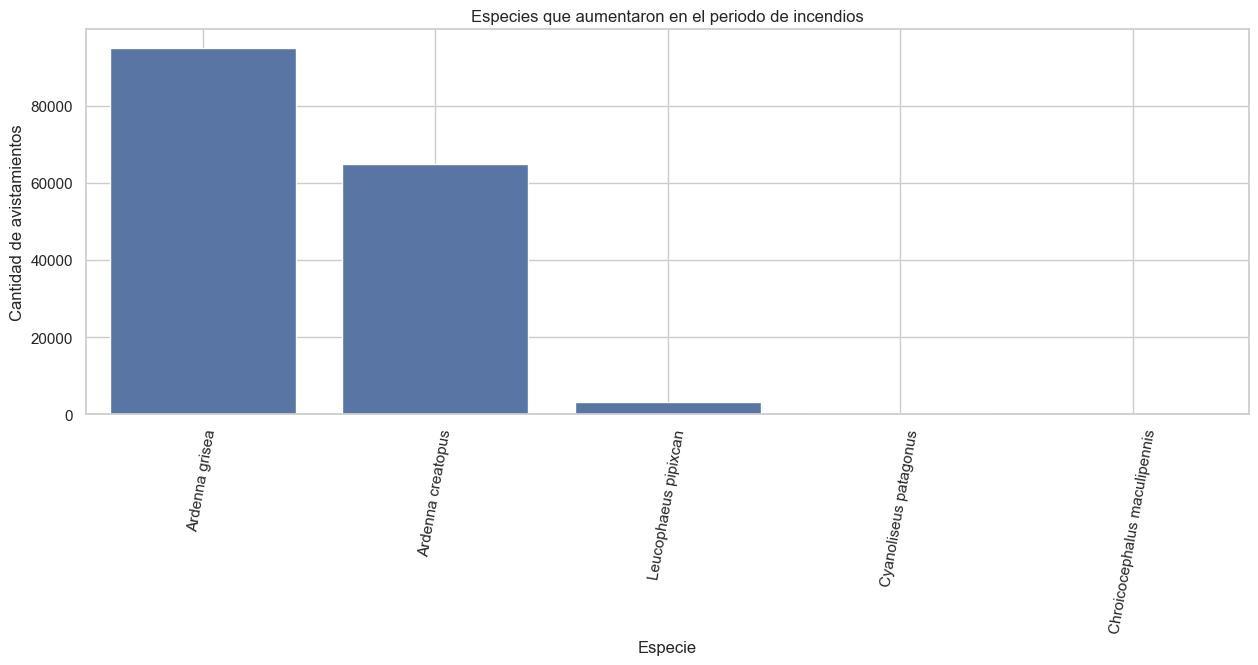

In [163]:
#Ahora plotemos las especies mas avistadas en la region del maule
plt.figure(figsize=(15, 5))
sns.barplot(data=diff.head(5), x="sciName", y="diff")
plt.title("Especies que aumentaron en el periodo de incendios")
plt.xlabel("Especie")
plt.ylabel("Cantidad de avistamientos")
plt.grid(True)
plt.xticks(rotation=80)
plt.show()


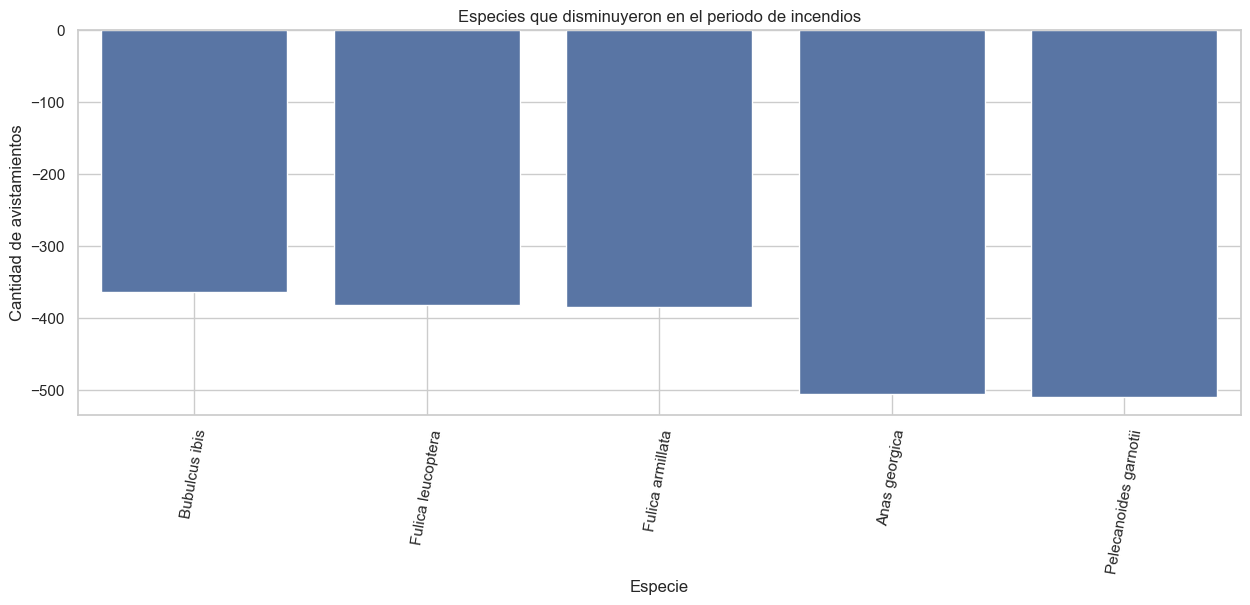

In [164]:
#Ahora plotemos las especies mas avistadas en la region del maule
plt.figure(figsize=(15, 5))
sns.barplot(data=diff.tail(), x="sciName", y="diff")
plt.title("Especies que disminuyeron en el periodo de incendios")
plt.xlabel("Especie")
plt.ylabel("Cantidad de avistamientos")
plt.grid(True)
plt.xticks(rotation=80)
plt.show()

En general, durante épocas de incendios forestales, la presencia de aves marinas puede disminuir debido a varios factores. Los incendios pueden afectar el hábitat y la disponibilidad de alimentos, causar desplazamientos de las aves a áreas menos afectadas, generar contaminantes en el aire y agua, y afectar colonias de anidación cercanas. Sin embargo, el impacto puede variar según la especie y las condiciones específicas de los incendios. Para obtener información más precisa, se recomienda consultar estudios científicos locales o hablar con expertos en ornitología y ecología marina.

## FAMILIAS DE AVES MAS FRECUNTADAS POR ZONA

Ahora agruparemos las especies por su cantidad de avistamientos. Divideremos en 3 partes, zona norte, centro y sur

In [165]:
unificado = pd.concat([df_aves_15, df_aves_16, df_aves_17, df_aves_18, df_aves_19, df_aves_20, df_aves_21, df_aves_22])
tax = tax[['FAMILY_SCI_NAME', 'SCIENTIFIC_NAME']]
unificado = pd.merge(unificado, tax, left_on="sciName", right_on='SCIENTIFIC_NAME', how='inner')

Divideremos en 3 partes, zona norte, centro y sur

In [166]:
norte = unificado[(unificado['region'] == 'Arica y Parinacota') | 
                  (unificado['region'] == 'Tarapacá') |
                  (unificado['region'] == 'Antofagasta') | 
                  (unificado['region'] == 'Atacama') | 
                  (unificado['region'] == 'Coquimbo')
                  ]
centro = unificado[(unificado['region'] == 'Valparaíso') | 
                   (unificado['region'] == 'Región Metropolitana de Santiago') |
                    (unificado['region'] == "Libertador General Bernardo O'Higgins") | 
                    (unificado['region'] == 'Maule') |
                    (unificado['region'] == 'Ñuble')]
sur = unificado[(unificado['region'] == 'Biobío') |
                (unificado['region'] =='Aisén del General Carlos Ibáñez del Campo') |
                (unificado['region'] =='Araucanía') |
                (unificado['region'] =='Magallanes') |
                (unificado['region'] =='Bío-Bío') |
                (unificado['region'] =='Los Lagos') |
                (unificado['region'] =='Los Ríos')]

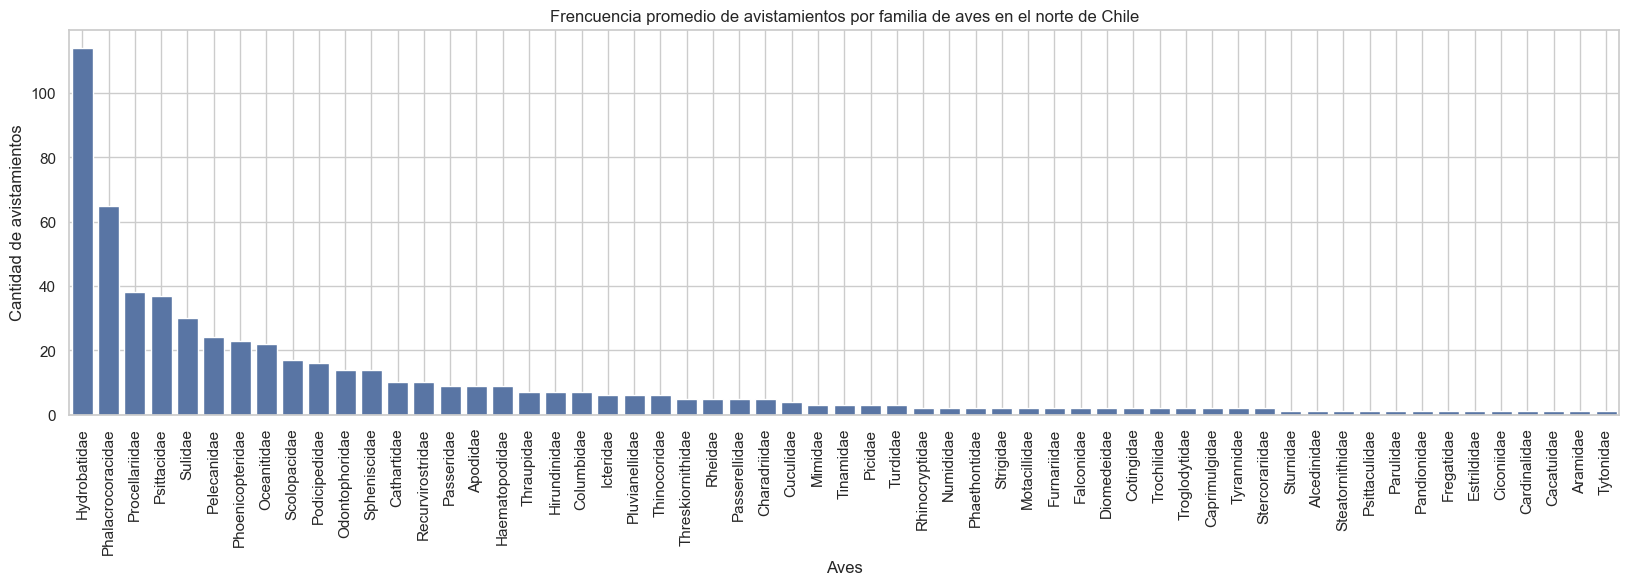

In [167]:
prom_norte = pd.pivot_table(data=norte,
                   index="FAMILY_SCI_NAME",
                   values='howMany',
                   aggfunc=np.mean
                   ).round(0).reset_index().sort_values(by="howMany", ascending=False)

plt.figure(figsize=(20, 5))
sns.barplot(data=prom_norte, x="FAMILY_SCI_NAME", y="howMany")
plt.title("Frencuencia promedio de avistamientos por familia de aves en el norte de Chile")
plt.xlabel("Aves")
plt.ylabel("Cantidad de avistamientos")
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

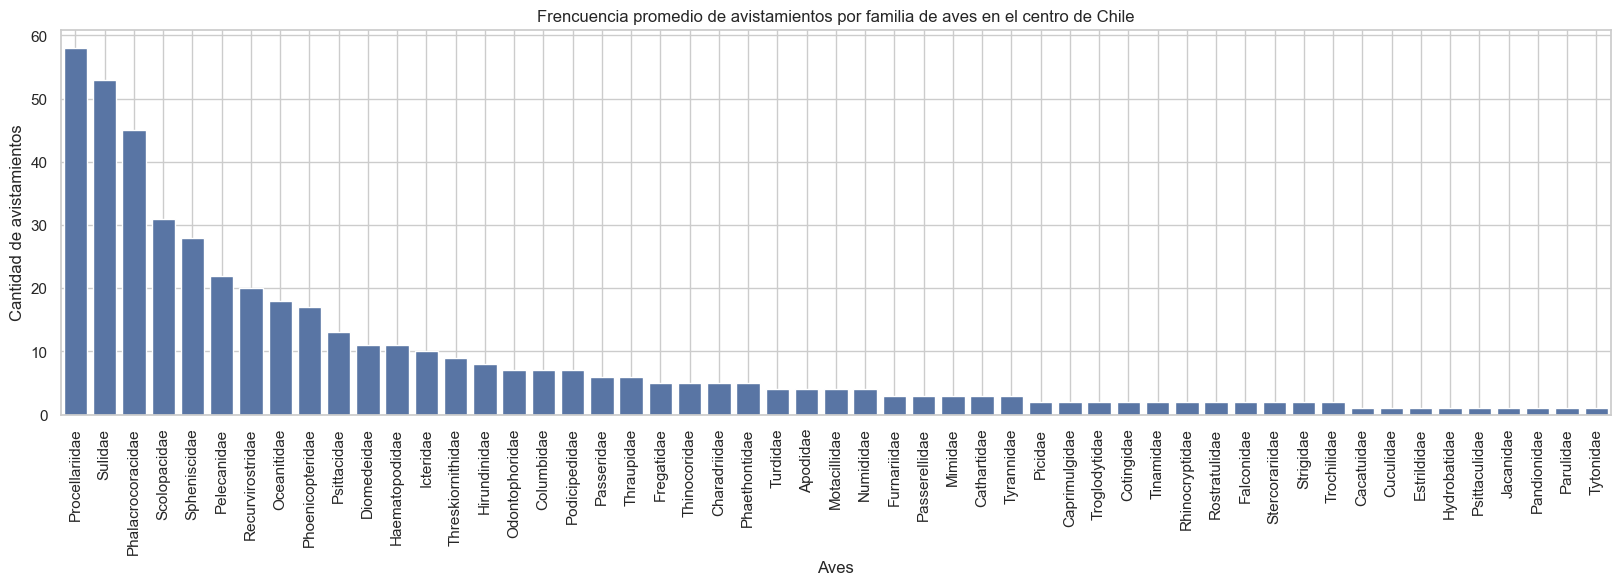

In [168]:
prom_centro = pd.pivot_table(data=centro,
                   index="FAMILY_SCI_NAME",
                   values='howMany',
                   aggfunc=np.mean
                   ).round(0).reset_index().sort_values(by="howMany", ascending=False)

plt.figure(figsize=(20, 5))
sns.barplot(data=prom_centro, x="FAMILY_SCI_NAME", y="howMany")
plt.title("Frencuencia promedio de avistamientos por familia de aves en el centro de Chile")
plt.xlabel("Aves")
plt.ylabel("Cantidad de avistamientos")
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

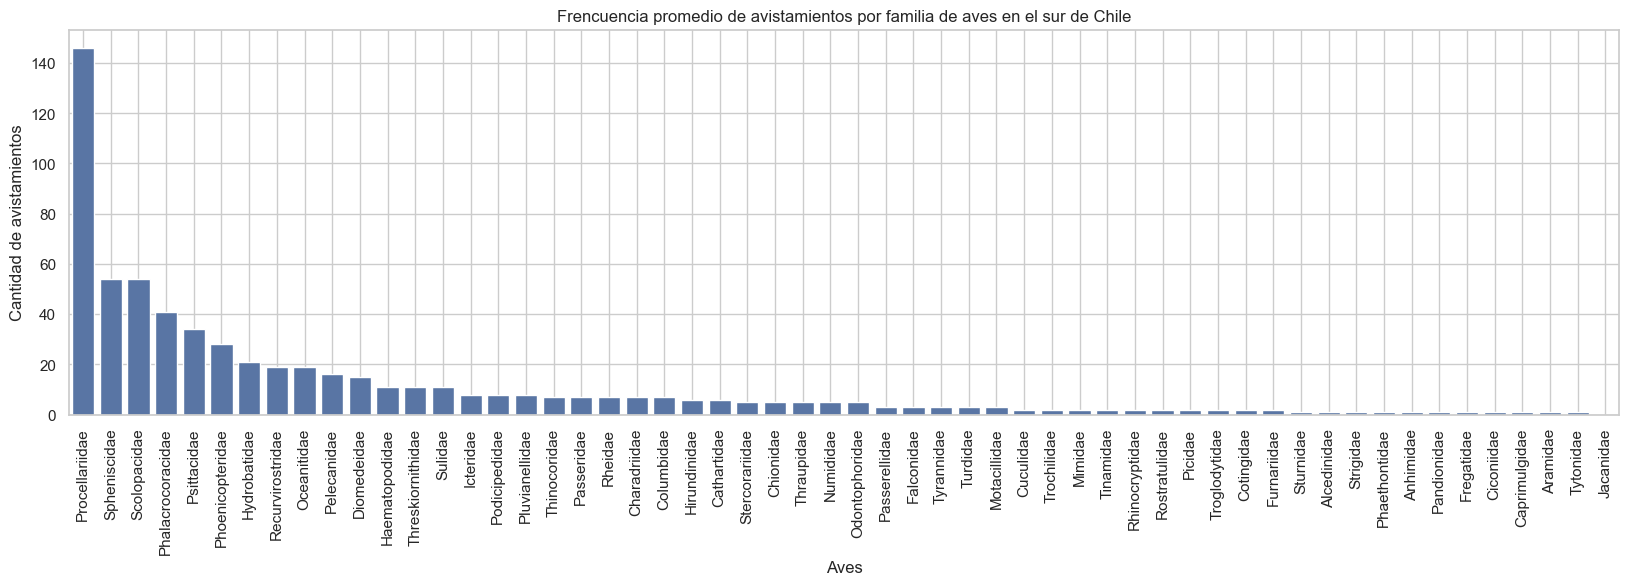

In [169]:
prom_sur = pd.pivot_table(data=sur,
                   index="FAMILY_SCI_NAME",
                   values='howMany',
                   aggfunc=np.mean
                   ).round(0).reset_index().sort_values(by="howMany", ascending=False)

plt.figure(figsize=(20, 5))
sns.barplot(data=prom_sur, x="FAMILY_SCI_NAME", y="howMany")
plt.title("Frencuencia promedio de avistamientos por familia de aves en el sur de Chile")
plt.xlabel("Aves")
plt.ylabel("Cantidad de avistamientos")
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

In [170]:
en_comun = pd.merge(prom_norte, prom_centro, on="FAMILY_SCI_NAME", how="inner")
en_comun = pd.merge(en_comun, prom_sur, on="FAMILY_SCI_NAME", how="inner")
en_comun = en_comun.rename(columns={"howMany_x": "prom_norte", "howMany_y": "prom_centro", "howMany": "prom_sur"})

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45],
 [Text(0, 0, 'Procellariidae'),
  Text(1, 0, 'Sulidae'),
  Text(2, 0, 'Phalacrocoracidae'),
  Text(3, 0, 'Scolopacidae'),
  Text(4, 0, 'Spheniscidae'),
  Text(5, 0, 'Pelecanidae'),
  Text(6, 0, 'Recurvirostridae'),
  Text(7, 0, 'Oceanitidae'),
  Text(8, 0, 'Phoenicopteridae'),
  Text(9, 0, 'Psittacidae'),
  Text(10, 0, 'Haematopodidae'),
  Text(11, 0, 'Diomedeidae'),
  Text(12, 0, 'Icteridae'),
  Text(13, 0, 'Threskiornithidae'),
  Text(14, 0, 'Hirundinidae'),
  Text(15, 0, 'Odontophoridae'),
  Text(16, 0, 'Columbidae'),
  Text(17, 0, 'Podicipedidae'),
  Text(18, 0, 'Passeridae'),
  Text(19, 0, 'Thraupidae'),
  Text(20, 0, 'Phaethontidae'),
  Text(21, 0, 'Fregatidae'),
  Text(22, 0, 'Charadriidae'),
  Text(23, 0, 'Thinocori

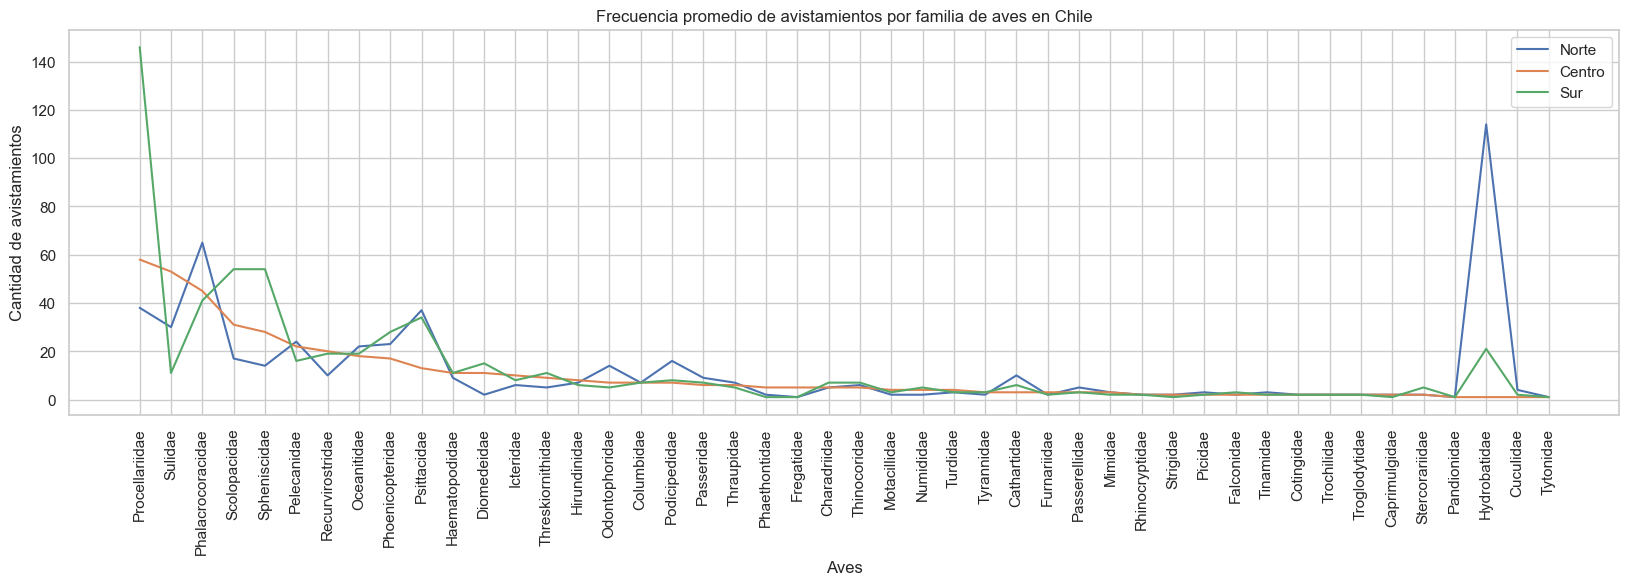

In [171]:
en_comun = en_comun.sort_values(by="prom_centro", ascending=False)
plt.figure(figsize=(20, 5))
sns.lineplot(data=en_comun, x="FAMILY_SCI_NAME", y="prom_norte", label="Norte")
sns.lineplot(data=en_comun, x="FAMILY_SCI_NAME", y="prom_centro", label="Centro")
sns.lineplot(data=en_comun, x="FAMILY_SCI_NAME", y="prom_sur", label="Sur")
plt.title("Frecuencia promedio de avistamientos por familia de aves en Chile")
plt.xlabel("Aves")
plt.ylabel("Cantidad de avistamientos")
plt.grid(True)
plt.xticks(rotation=90)

## FAMILIAS DE AVES MAS FRECUNTADAS POR ZONA

In [172]:
prom_norte = pd.pivot_table(data=norte,
                   index="FAMILY_SCI_NAME",
                   values='howMany',
                   aggfunc=np.mean
                   ).round(0).reset_index().sort_values(by="howMany", ascending=False)
prom_norte.head(5)

,FAMILY_SCI_NAME,howMany
19,Hydrobatidae,114.0
32,Phalacrocoracidae,65.0
37,Procellariidae,38.0
38,Psittacidae,37.0
49,Sulidae,30.0


In [173]:
prom_centro = pd.pivot_table(data=centro,
                   index="FAMILY_SCI_NAME",
                   values='howMany',
                   aggfunc=np.mean
                   ).round(0).reset_index().sort_values(by="howMany", ascending=False)
prom_centro.head(5)

,FAMILY_SCI_NAME,howMany
33,Procellariidae,58.0
43,Sulidae,53.0
29,Phalacrocoracidae,45.0
39,Scolopacidae,31.0
40,Spheniscidae,28.0


In [174]:
prom_sur = pd.pivot_table(data=sur,
                   index="FAMILY_SCI_NAME",
                   values='howMany',
                   aggfunc=np.mean
                   ).round(0).reset_index().sort_values(by="howMany", ascending=False)
prom_sur.head(5)

,FAMILY_SCI_NAME,howMany
35,Procellariidae,146.0
42,Spheniscidae,54.0
41,Scolopacidae,54.0
30,Phalacrocoracidae,41.0
36,Psittacidae,34.0


## 6.- Pandemia😷

La pandemia ha sido uno de los mayores eventos que han transformado nuestro país y el mundo en los últimos años, en donde practicamente en cada rincón del plantena existió un confinamiento masivo para evitar la propagación de esta. 

Por lo mismo, y más específicamente, en nuestro país fuimos unos de los confinamiento más largos, de practicamente 6-7 meses de duración, donde la naturaleza y medio ambiente tuvo la menor interacción con el humano en mucho tiempo. Esto nos haría pensar y sobretodo analizar el comportamiento de las aves tanto pre-pandemia como post y si esta pandemia fue suficiente o no, para poder sacar conclusiones a la hora de analizar el comportamiento y avistamiento de estas  

## Avistamientos 🦅

Analizaremos cuales fueron los avistamientos de aves en los últimos años, donde nuestra hipotesis principal será que los avistamientos tendrán un efecto positivo post pandemia, es decir existirán mayor cantidad que los años pre pandemicos. 


In [175]:
df_aves_cantidad = pd.DataFrame(columns=["year", "howMany"])
df_aves_cantidad["year"] = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
df_aves_cantidad["howMany"] = [df_aves_15["howMany"].sum(), df_aves_16["howMany"].sum(), df_aves_17["howMany"].sum(), df_aves_18["howMany"].sum(), df_aves_19["howMany"].sum(), df_aves_20["howMany"].sum(), df_aves_21["howMany"].sum(), df_aves_22["howMany"].sum()]

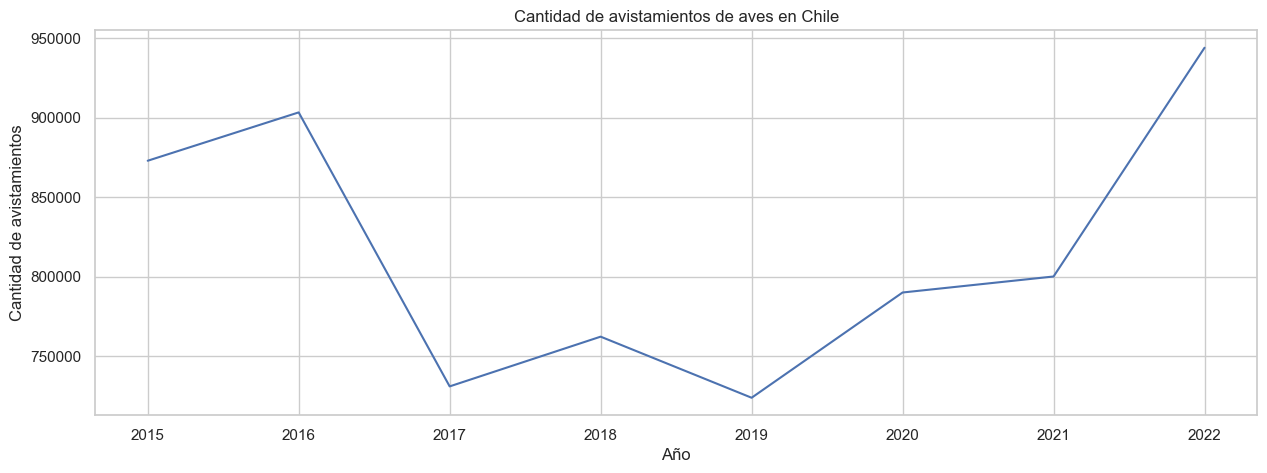

In [176]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_aves_cantidad, x="year", y="howMany")
plt.title("Cantidad de avistamientos de aves en Chile")
plt.xlabel("Año")
plt.ylabel("Cantidad de avistamientos")
plt.show()

Podemos observar que post 2020 el indice de avistamientos aumenta exponencial y notoriamente en comparación a los últimos años observados

Como comentamos anteriormente sabemos que los incendios tienen una relación directa con los avistamientos de pajaros, por lo mismo para que la subida de avistamientos tengan directa relación con los efectos de la pandemia revisaremos si en post 2020 los incendios pudieron disminuir, lo cual no necesariamente nos diría que la pandemia fue la principal causal del repunte.

In [177]:
df_ocurrencia_mes_2020_2021 = pd.read_csv(os.path.join("data", "ocurrencia_mes", "ocurrencia_mes_2020_2021.csv"))
df_ocurrencia_mes_2021_2022 = pd.read_csv(os.path.join("data", "ocurrencia_mes", "ocurrencia_mes_2021_2022.csv"))
df_ocurrencia_mes_2020_2021["AÑO"] = "2020-2021"
df_ocurrencia_mes_2021_2022["AÑO"] = "2021-2022"
df_ocurrencia_meses = pd.concat([df_ocurrencia_mes_2020_2021, df_ocurrencia_mes_2021_2022])
df_ocurrencia_meses

,MES,XV,I,II,III,IV,V,RM,VI,VII,XVI,VIII,IX,XIV,X,XI,XII,TOTAL,AÑO
0,JULIO,0,0,0,0,0,2,16,1,0,0,0,1,0,0,0,1,21,2020-2021
1,AGOSTO,1,0,0,0,1,10,28,4,6,1,0,6,0,0,2,0,59,2020-2021
2,SEPTIEMBRE,2,1,0,0,5,23,9,3,14,8,26,45,3,1,3,3,146,2020-2021
3,OCTUBRE,0,2,0,6,11,21,40,15,54,33,171,76,2,6,3,1,441,2020-2021
4,NOVIEMBRE,2,0,1,0,12,50,55,28,92,50,373,138,4,21,4,0,830,2020-2021
5,DICIEMBRE,0,0,1,1,6,71,74,56,150,102,457,129,12,30,4,1,1094,2020-2021
6,ENERO,1,1,1,2,11,75,58,45,176,105,697,238,20,53,2,3,1488,2020-2021
7,FEBRERO,2,0,0,3,6,33,13,16,64,49,453,242,47,107,19,7,1061,2020-2021
8,MARZO,1,0,0,0,4,57,32,26,98,65,470,316,44,99,11,4,1227,2020-2021
9,ABRIL,0,1,1,0,2,46,19,22,63,64,230,165,12,20,0,0,645,2020-2021


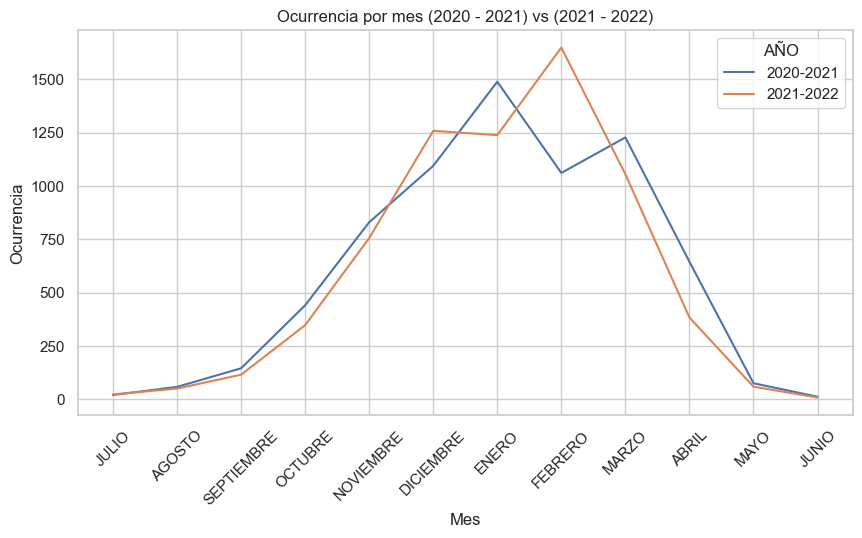

In [178]:
plt.figure(figsize=(10, 5))
plt.title("Ocurrencia por mes (2020 - 2021) vs (2021 - 2022)")
plt.xlabel("Mes")
plt.ylabel("Ocurrencia")
sns.lineplot(data=df_ocurrencia_meses, x="MES", y="TOTAL", hue="AÑO")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Podemos notar que los años post 2020 son normales en cuanto a cantidad de incendios y daños, ya que en los meses más conflictivos son siempre de Diciembre a Febrero. Es decir, fueron años normales, donde hubieron incendios de igual manera que en cualquiera de los pre pandemia. 

In [179]:
df_aves_20_mes = df_aves_20.groupby("obsDt").sum()
df_aves_20_mes = df_aves_20_mes.reset_index()
df_aves_20_mes = df_aves_20_mes[["obsDt", "howMany"]]
df_aves_20_mes = df_aves_20_mes.rename(columns={"obsDt": "mes", "howMany": "cantidad"})
df_aves_20_mes["mes"] = pd.to_datetime(df_aves_20_mes["mes"])
df_aves_20_mes["mes"] = df_aves_20_mes["mes"].dt.month
df_aves_20_mes = df_aves_20_mes.groupby("mes").sum()
df_aves_20_mes = df_aves_20_mes.reset_index()
df_aves_20_mes


,mes,cantidad
0,1,108313.0
1,2,114806.0
2,3,63550.0
3,4,53499.0
4,5,41607.0
5,6,55281.0
6,7,54309.0
7,8,43037.0
8,9,50648.0
9,10,53092.0


Por ejemplo en 2020, existio una bajada notoria en los avitamientos en los meses de marzo a junio, y como vimos anteriormente, solo en los meses de Diciembre y Febrero existen la mayor (por no decir practicamente todos) cantidad de incendios del año. Esto nos demestra que la bajada de avistamientos en netamente otorgada a la incapacidad de personas debido al confinamiento de poder salir a avistar aves, y aún así pudimos observar que 2020 fue un año que supero (por poco pero de igual manera) a sus anteriores años. 

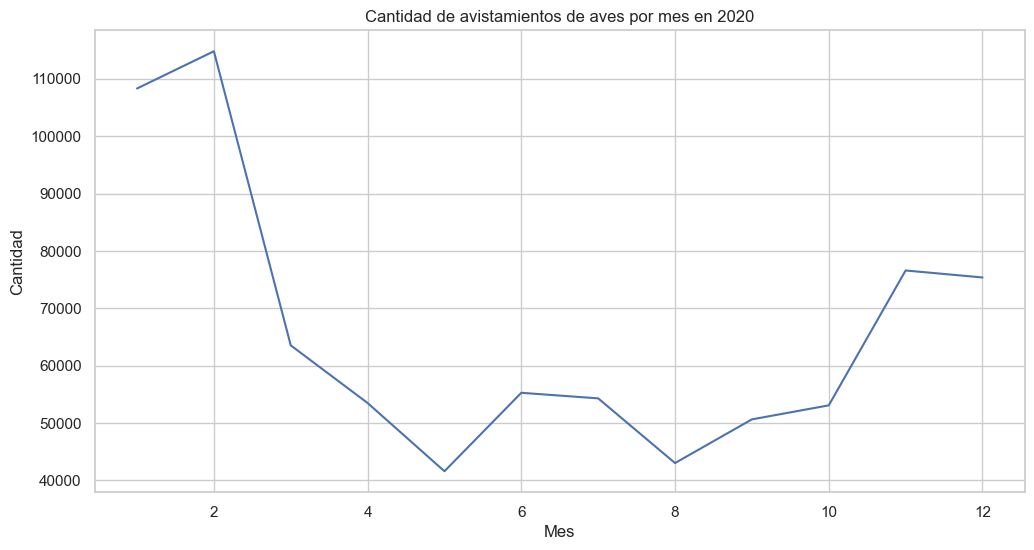

In [180]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_aves_20_mes, x="mes", y="cantidad")
plt.title("Cantidad de avistamientos de aves por mes en 2020")
plt.xlabel("Mes")
plt.ylabel("Cantidad")
plt.show()

Con esto concluimos positivamente nuestra hipostesis principal, ya que efectivamente la pandemia afecto positivamente al avistamiento de pajaros. 

## Predicción del 2023 🤓

Intentaremos predecir los avistamientos del 2023 entendiendo todo lo anteriormente mencionado, es decir, nuestra hipostesis será que en 2023 la cantidad de avistamientos sigue siendo positiva, más con cierto declive ya que como seres humanos ha sido junto a 2022 de los años más "normales" hablando post-pandemia

In [181]:
df_2015 = pd.DataFrame(columns=["year", "howMany"])
df_2015["year"] = [2015]
df_2015["howMany"] = [df_aves_15["howMany"].sum()]

df_2016 = pd.DataFrame(columns=["year", "howMany"])
df_2016["year"] = [2016]
df_2016["howMany"] = [df_aves_16["howMany"].sum()]  

df_2017 = pd.DataFrame(columns=["year", "howMany"])
df_2017["year"] = [2017]
df_2017["howMany"] = [df_aves_17["howMany"].sum()]

df_2018 = pd.DataFrame(columns=["year", "howMany"])
df_2018["year"] = [2018]
df_2018["howMany"] = [df_aves_18["howMany"].sum()]

df_2019 = pd.DataFrame(columns=["year", "howMany"])
df_2019["year"] = [2019]
df_2019["howMany"] = [df_aves_19["howMany"].sum()]

df_2020 = pd.DataFrame(columns=["year", "howMany"])
df_2020["year"] = [2020]
df_2020["howMany"] = [df_aves_20["howMany"].sum()]

df_2021 = pd.DataFrame(columns=["year", "howMany"])
df_2021["year"] = [2021]
df_2021["howMany"] = [df_aves_21["howMany"].sum()]

df_2022 = pd.DataFrame(columns=["year", "howMany"])
df_2022["year"] = [2022]
df_2022["howMany"] = [df_aves_22["howMany"].sum()]


In [182]:
df_total_predict = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022])
df_total_predict = df_total_predict.reset_index(drop=True)
df_total_predict

,year,howMany
0,2015,872937.0
1,2016,903323.0
2,2017,731102.0
3,2018,762365.0
4,2019,723965.0
5,2020,790120.0
6,2021,800179.0
7,2022,943959.0


In [183]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df_total_predict[["year"]].values.reshape(-1, 1)
y = df_total_predict["howMany"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

y_pred_2023 = model.predict([[2023]])
y_pred_2024 = model.predict([[2024]])

print("Prediccion para el año 2023: ", y_pred_2023)


Prediccion para el año 2023:  [831242.04]


In [184]:
df_2023 = pd.DataFrame(columns=["year", "howMany"])
df_2023["year"] = [2023]
df_2023["howMany"] = y_pred_2023
df_total_predict = pd.concat([df_total_predict, df_2023])
df_total_predict = df_total_predict.reset_index(drop=True)
df_total_predict

,year,howMany
0,2015,872937.00
1,2016,903323.00
2,2017,731102.00
3,2018,762365.00
4,2019,723965.00
5,2020,790120.00
6,2021,800179.00
7,2022,943959.00
8,2023,831242.04


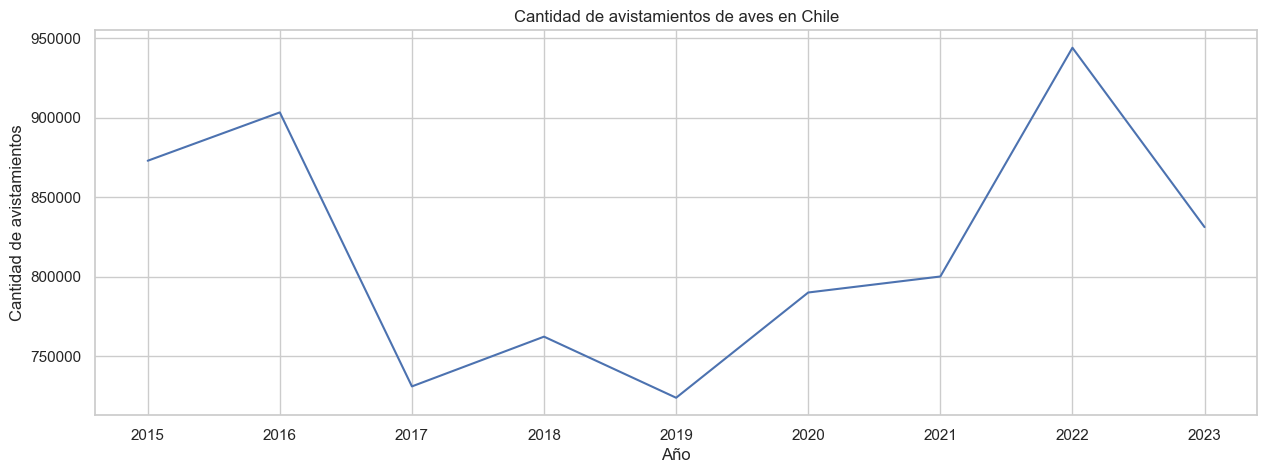

In [185]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_total_predict, x="year", y="howMany")
plt.title("Cantidad de avistamientos de aves en Chile")
plt.xlabel("Año")
plt.ylabel("Cantidad de avistamientos")
plt.show()

Efectivamente el 2023 fue un buen año en cuano a avistamientos, pero notoriamente vemos que tiende a bajar, quizas en un futuro no muy lejano volverá a seguir un patron parecido al mostrado por ejemplo en 2017-2019 

## AVES MAS FRECUENTES POR REGION Y ANHO

In [186]:
def ave_mas_frecuente_region_anho(region, anho):
    df = unificado[unificado['region'] == region]
    df = df[df['obsDt'].dt.year == anho]
    return df.groupby(by=['comName', 'sciName']).sum('howMany').reset_index().sort_values(by="howMany", ascending=False).head(1)

In [187]:
ave_mas_frecuente_region_anho('Arica y Parinacota', 2017)

,comName,sciName,howMany,lat,lng,locationPrivate,exoticCategory
139,Sanderling,Calidris alba,6281.0,-607.771479,-2320.630682,6,-33
